In [1]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import datetime
from scipy import stats

In [2]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

tbfont = {'fontname': 'Times New Roman Bold'}
tfont = {'fontname':'Times New Roman'}

mpl.rc('text', usetex=True)

In [4]:
gram = pd.read_csv('GrammarData_deidentified.csv', encoding = 'utf-8')
gram['Duration (in seconds)'] = gram['Duration (in seconds)'].astype(int)

gram['score'] = gram['SC0'].astype(float)
gram['absAssess0'] = gram['absAssess0'].astype(float)
gram['absAssess1'] = gram['absAssess1'].astype(float)
gram['relAssess0'] = gram['relAssess0_1'].astype(float)
gram['relAssess1'] = gram['relAssess1_1'].astype(float)
gram['diffSelf0'] = gram['diffSelf0_1'].astype(float)
gram['diffSelf1'] = gram['diffSelf1_1'].astype(float)
gram['diffOther0'] = gram['diffOther0_1'].astype(float)
gram['diffOther1'] = gram['diffOther1_1'].astype(float)
gram['grammarAssess0'] = gram['grammarAssess0_1'].astype(float)
gram['grammarAssess1'] = gram['grammarAssess1_1'].astype(float)

len(gram)

3515

In [6]:
params = {'axes.labelsize': 20,'axes.titlesize':20, 'text.fontsize': 20, 'legend.fontsize': 20, 'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)

/Users/racheljansen/anaconda/envs/p36/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


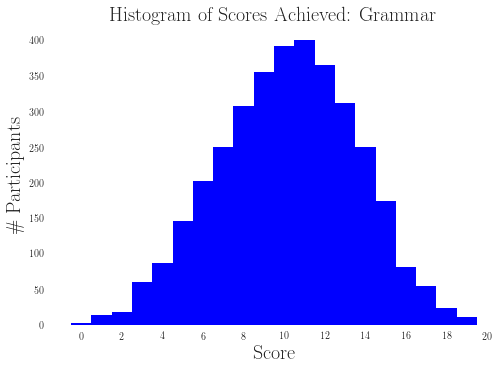

In [8]:
fig, ax = plt.subplots()
plt.hist(gram.score, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],color='b',align='left')
plt.title('Histogram of Scores Achieved: Grammar',fontsize=20)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks([0,50,100,150,200,250,300,350,400])

ax.set_xlabel('Score',fontsize=20)#
ax.set_ylabel('\# Participants',fontsize=20)

ax.set_facecolor('white')
plt.show()
# fig.savefig('figs/score_hist_grammar.eps', dpi=1000)

In [9]:
gram['gender'].value_counts()

Woman                1780
Man                  1698
Prefer not to say      13
Other                  12
Name: gender, dtype: int64

In [11]:
gram.race.value_counts()

White                                                                                     2560
Black or African American                                                                  304
Asian/Asian American                                                                       246
Hispanic or Latino                                                                         215
White,Hispanic or Latino                                                                    35
Other                                                                                       30
Prefer not to say                                                                           20
American Indian or Alaska Native                                                            19
White,Black or African American                                                             16
White,Asian/Asian American                                                                  12
White,American Indian or Alaska Native            

In [13]:
gram['age_groups'] = np.where(gram.age.astype(float) <= 35, '18-34', 
                              np.where(gram.age.astype(float) >=55 , '55+', 
                                       '35-54'))
gram.age_groups.value_counts()

18-34    1982
35-54    1175
55+       358
Name: age_groups, dtype: int64

In [26]:
gram_ages = gram[(gram.age.astype(float) < 100) & (gram.age.astype(float) >= 18)]
print('min age: ', gram_ages.age.astype(float).min())
print('max age: ', gram_ages.age.astype(float).max())

min age:  18.0
max age:  88.0


In [32]:
print('mean age: ', gram_ages.age.astype(float).mean(), ' years')

mean age:  36.53931941664284  years


In [31]:
print('mean time: ', gram['Duration (in seconds)'].mean()/60, ' minutes')

mean time:  19.61240872451399  minutes


In [22]:
print('mean score: ', gram['score'].mean(), 'out of 20')
print('std score: ', gram['score'].std())
print('mean post- percentile estimate', gram.relAssess1.mean(), 'std dev.', gram.relAssess1.std())
print('mean post- score estimate', gram.absAssess1.mean(), 'std dev.', gram.absAssess1.std())
print('mean pre- percentile estimate', gram.relAssess0.mean(), 'std dev.', gram.relAssess0.std())
print('mean pre- score estimate', gram.absAssess0.mean(), 'std dev.', gram.absAssess0.std())
print('mean pre- grammar estimate', gram.grammarAssess0.mean(), 'std dev.', gram.grammarAssess0.std())
print('mean post- grammar estimate', gram.grammarAssess1.mean(), 'std dev.', gram.grammarAssess1.std())

mean score:  10.17126600284495 out of 20
std score:  3.4021360705337487
mean post- percentile estimate 58.379516358463725 std dev. 20.56975669493571
mean post- score estimate 12.494736842105263 std dev. 3.9110286043866185
mean pre- percentile estimate 68.66600284495021 std dev. 18.6467161949458
mean pre- score estimate 14.949075391180655 std dev. 3.5606735697951533
mean pre- grammar estimate 70.27766714082503 std dev. 18.48646228107146
mean post- grammar estimate 60.25234708392603 std dev. 20.42934969617716


In [23]:
from scipy.stats.stats import pearsonr
print('pre- and post- absolute assessments: ', pearsonr(gram.absAssess0.astype(int),gram.absAssess1.astype(int)))
print('score and pre- absolute assessments: ', pearsonr(gram.score.astype(int),gram.absAssess0.astype(int)))
print('score and post- absolute assessments: ', pearsonr(gram.score.astype(int),gram.absAssess1.astype(int)))

pre- and post- absolute assessments:  (0.65714037286650739, 0.0)
score and pre- absolute assessments:  (0.23260672333420354, 2.126690291981347e-44)
score and post- absolute assessments:  (0.28353478336781857, 5.5372969715933977e-66)


In [24]:
print('mean post- diff self', gram.diffSelf1.mean(), 
      'std dev.', gram.diffSelf1.std() )
print('mean post- diff other', gram.diffOther1.mean(), 
      'std dev.', gram.diffOther1.std() )

mean post- diff self 5.565007112375533 std dev. 2.2584752081942194
mean post- diff other 6.1610241820768135 std dev. 1.840762467989424


# Model fitting

In [35]:
# bayesian inference model with guessing parameter (g=0.2)
preds_guess = pd.read_csv('./../Model/WithGuessing/preds451_basic_all.csv', encoding = "utf-8") 

In [36]:
ssesG = []
for i in range(451): # first loop through each simulated set of values
    pred = preds_guess[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(gram['score'],gram['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesG.append(sse)
# ssesG

In [37]:
print('min sse: ', min(ssesG))
print('index: ', ssesG.index(min(ssesG)))

min sse:  49591.5758412
index:  239


In [42]:
epsilons = np.linspace(0,0.5,num=11)
muts = np.linspace(-1,1,num=41)

preds_ind = []
for mut in muts: # loop through mu thetas
    for eps in epsilons: # loop through epsilons
        preds_ind.append(('eps: ', eps,'mu: ', mut))

In [43]:
preds_ind[239]

('eps: ', 0.40000000000000002, 'mu: ', 0.050000000000000044)

In [38]:
# performance-dependent estimation model with guessing
preds_dk_guess = pd.read_csv('./../Model/WithGuessing/preds4961_depend_all.csv', encoding = "utf-8") 

In [39]:
ssesGdk = []
for i in range(4961): # first loop through each simulated set of values
    pred = preds_dk_guess[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(gram['score'],gram['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesGdk.append(sse)
# ssesGdk

In [40]:
print('min sse: ', min(ssesGdk))
print('index: ', ssesGdk.index(min(ssesGdk)))

min sse:  49073.0424492
index:  2642


In [44]:
epsilons = np.linspace(0,0.5,num=11)
alphas = np.linspace(0,0.5,11) 
muts = np.linspace(-1,1,num=41)

preds_dep = []
for mut in muts: # loop through mu thetas 
    for eps0 in epsilons: # loop through epsilon intercepts
        for alph in alphas: # loop through epsilon slopes
            preds_dep.append(('mu: ', mut, 'eps: ', eps0, 'alpha: ', alph))

In [45]:
preds_dep[2642]

('mu: ',
 0.050000000000000044,
 'eps: ',
 0.45000000000000001,
 'alpha: ',
 0.10000000000000001)

### Finding the BICs and doing a likelihood ratio test



These models are nested, so we can do a likelihood ratio test. The test statistic is $2*(L_1-L_0)$, where $L_1$ and $L_0$ are the log likelihoods of the more complex and simpler models respectively. The statistic is approximately chi-square with df 1, for a cutoff of 3.84.

In [46]:
from scipy.stats import chisqprob
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

In [47]:
k0 = 3 # bayesian inference model has 3 params (mu, sigma, eps)
k1 = 4 # performance-dependent estimation model has 4 (mu, sigma, eps0, alpha)
n = 3515 # total participants
s0 = min(ssesG) # sse for ind model
s1 = min(ssesGdk) # sse for dep model

L0 = -n/2 *(1 + np.log(2*np.pi*(s0/n)))
BIC0 = k0 * np.log(n) - 2*L0
BIC0

19303.069077087748

In [48]:
L0

-9639.2873463375072

In [49]:
L1 = -n/2 *(1 + np.log(2*np.pi*(s1/n)))
BIC1 = k1 * np.log(n) - 2*L1
BIC1

19274.287260520225

In [50]:
LR = likelihood_ratio(L0,L1)

p = chisqprob(LR, 1) # L1 has 1 DoF more than L0

print('p: %.30f' % p)
print(LR)

p: 0.000000001214085150559433412091
36.9466113718


/Users/racheljansen/anaconda/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Bayes Factor

$$
\log P(data | model) \approx logmax + \log \sum_{m=1}^M exp(log(P(data|\theta^{(M)}) - logmax) - \log M
$$

$$
\text{Bayes Factor} = \frac{P(D|H_1)}{P(D|H_0)} 
= \log P(D|H_1) - \log (P(D|H_0)
$$

Where $H_1$ refers to the dependent model and $H_0$ to the independent model

In [51]:
# first calculate p_ind for independent model
# L0 is logmax

logs = 0 # need to take the sum
for i in range(len(preds_guess.columns)): #same as (len(sses))
    loglik = -n/2 *(1 + np.log(2*np.pi*(ssesG[i]/n)))
    logs+= np.exp(loglik - L0)

p_ind = L0 + logs - np.log(len(ssesG))
p_ind

-9644.3988023836919

In [52]:
# then calculate p_dep for dependent model
# L1 is logmax

logs_dep = 0
nas=0 # counting the number
for i in range(len(preds_dk_guess.columns)): #same as (len(ssesDEP))
    if preds_dk_guess[str(i)][1] != 0:
        loglik = -n/2 *(1 + np.log(2*np.pi*(ssesGdk[i]/n)))
        logs_dep+= np.exp(loglik - L1)
    else:
        nas+=1
    
p_dep = L1 + logs_dep - np.log(len(ssesGdk))
p_dep

-9628.259767977368

In [53]:
len(ssesGdk) - nas # checking that we indeed run over 2706 predictions

2706

In [54]:
# calculate bayes factor ratio: 
bf = p_dep - p_ind
bf

16.139034406323844

## Plotting the best fit models

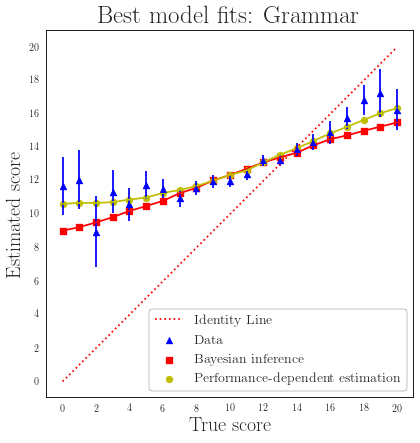

In [44]:
# plot model predictions and data means - GUESS MODEL

k = gram.absAssess1.groupby(gram_all.score).mean()
# k=k[:-1]
sems = gram.absAssess1.groupby(gram_all.score).sem() # SEMs
# sems=sems[:-1]
conf = sems*1.96

score = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# scoreNoZero = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(score, k, label="Data",color='b',marker='^')
ax.errorbar(score, k, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(score, preds_guess['239'],color='r',label="_nolegend_")
ax.scatter(score, preds_guess['239'], label="Bayesian inference",color='r',marker='s')
ax.plot(score, preds_dk_guess['2642'],color='y',label='_nolegend_')
ax.scatter(score, preds_dk_guess['2642'], label="Performance-dependent estimation",color='y')


ax.set_facecolor('white')
plt.title('Best model fits: Grammar', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(-1, color='black')
plt.axhline(21, color='black')
plt.axvline(21, color='black')
ax.set_xlim(-1,21)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks(np.arange(0, 22, step=2))

ax.set_xlabel('True score',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([0,5,10,15,20],[0,5,10,15,20], "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_grammar_guess.png')
# fig.savefig('figs/Best_grammar_guess.eps', dpi=1000)

### Quartile plot

In [45]:
gram_all['quartile'] = pd.qcut(gram_all["score"], 4)

In [46]:
gram_all['quartile'].value_counts()

(-0.001, 8.0]    1091
(10.0, 13.0]     1078
(8.0, 10.0]       748
(13.0, 20.0]      598
Name: quartile, dtype: int64

In [47]:
scores_quart = gram.score.groupby(gram.quartile).mean()
scores_quart

quartile
(-0.001, 8.0]     6.182401
(8.0, 10.0]       9.524064
(10.0, 13.0]     11.918367
(13.0, 20.0]     15.108696
Name: score, dtype: float64

In [48]:
SAquarts = gram.absAssess1.groupby(gram.quartile).mean()
SAquarts

quartile
(-0.001, 8.0]    11.321723
(8.0, 10.0]      11.989305
(10.0, 13.0]     12.920223
(13.0, 20.0]     14.500000
Name: absAssess1, dtype: float64

In [49]:
SAquarts_sem = gram.absAssess1.groupby(gram.quartile).sem()
SAquarts_sem

quartile
(-0.001, 8.0]    0.130577
(8.0, 10.0]      0.138975
(10.0, 13.0]     0.103949
(13.0, 20.0]     0.127960
Name: absAssess1, dtype: float64

In [50]:
gram.absAssess1.groupby(gram.quartile).std()

quartile
(-0.001, 8.0]    4.312992
(8.0, 10.0]      3.800922
(10.0, 13.0]     3.412950
(13.0, 20.0]     3.129130
Name: absAssess1, dtype: float64

In [51]:
gram['ind'] = [preds_guess['239'][x] for x in gram['score'].astype(int)]

In [52]:
gram['dep'] = [preds_dk_guess['2642'][x] for x in gram['score'].astype(int)]

In [53]:
ind_quarts = gram.ind.groupby(gram.quartile).mean()
ind_quarts

quartile
(-0.001, 8.0]    10.934071
(8.0, 10.0]      12.190058
(10.0, 13.0]     13.045430
(13.0, 20.0]     14.100698
Name: ind, dtype: float64

In [54]:
dep_quarts = gram.dep.groupby(gram.quartile).mean()
dep_quarts

quartile
(-0.001, 8.0]    11.312894
(8.0, 10.0]      12.187277
(10.0, 13.0]     13.058042
(13.0, 20.0]     14.425899
Name: dep, dtype: float64

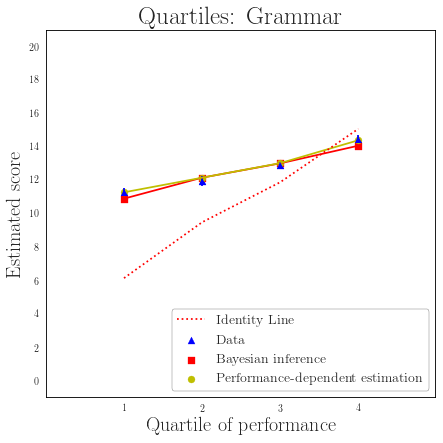

In [56]:
# plot model predictions and data means

conf = SAquarts_sem*1.96

quarts = [1,2,3,4]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(quarts, SAquarts, label="Data",color='b',marker='^')
ax.errorbar(quarts, SAquarts, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(quarts, ind_quarts,color='r',label="_nolegend_")
ax.scatter(quarts, ind_quarts, label="Bayesian inference",color='r',marker='s')
ax.plot(quarts, dep_quarts,color='y',label='_nolegend_')
ax.scatter(quarts, dep_quarts, label="Performance-dependent estimation",color='y')


ax.set_facecolor('white')
plt.title('Quartiles: Grammar', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(0, color='black')
plt.axhline(21, color='black')
plt.axvline(5, color='black')
ax.set_xlim(0,5)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(1, 5, step=1))
ax.set_yticks(np.arange(0, 22, step=2))
ax.set_xlabel('Quartile of performance',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([1,2,3,4],scores_quart, "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
# ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_model_quartiles_grammar.png')
# fig.savefig('figs/Best_model_quartiles_grammar.eps', dpi=1000)

### Quadratic trend analysis

In [57]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [58]:
x = gram.score
y = gram.absAssess1

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

3.731838944940277
0.08927476001825863


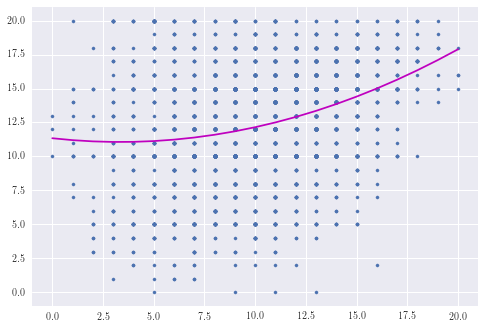

In [38]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [43]:
model.coef_

array([[ 0.        , -0.16498971,  0.02461279]])

In [44]:
model.intercept_

array([11.34178274])

In [45]:
model.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [52]:
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Versions/3.2/Resources'

import rpy2

# the following lines will allow us to convert between Pandas DataFrames and R DataFrames
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import ri2py

# this loads the R magic extension
%load_ext rpy2.ipython

In [53]:
gram['score2'] = [score**2 for score in gram.score]
gram[['score','score2']].head()

,score,score2
7,4.0,16.0
8,10.0,100.0
9,6.0,36.0
10,11.0,121.0
11,10.0,100.0


In [54]:
%%R -i gram

model0 <- lm(absAssess1 ~ score + score2, data=gram)
summary(model0)
# anova(model0)


Call:
lm(formula = absAssess1 ~ score + score2, data = gram_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3565  -2.3565   0.1495   2.6253   8.9317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.341783   0.419425  27.041  < 2e-16 ***
score       -0.164990   0.085900  -1.921   0.0548 .  
score2       0.024613   0.004205   5.853 5.28e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.733 on 3512 degrees of freedom
Multiple R-squared:  0.08927,	Adjusted R-squared:  0.08876 
F-statistic: 172.1 on 2 and 3512 DF,  p-value: < 2.2e-16



In [55]:
%%R -i gram

model1 <- lm(absAssess1 ~ score, data=gram)
print(sum(model1$residuals^2))
summary(model1)
# anova(model1)

[1] 49429.53

Call:
lm(formula = absAssess1 ~ score, data = gram_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.4168  -2.4389   0.2573   2.5611  10.4946 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.1794     0.1995   46.02   <2e-16 ***
score         0.3260     0.0186   17.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.751 on 3513 degrees of freedom
Multiple R-squared:  0.08039,	Adjusted R-squared:  0.08013 
F-statistic: 307.1 on 1 and 3513 DF,  p-value: < 2.2e-16



In [32]:
%%R -i gram_all
print(sum(model1$residuals^2))
print(sum(model0$residuals^2))

[1] 49429.53
[1] 48952.08


In [48]:
df1 = 3513
df2 = 3512
sse1 = 49429.53
sse2 = 48952.08

In [37]:
f = ((sse1-sse2)/(df1-df2))/(sse2/df2)
f

34.253996970097894

In [80]:
%%R -i gram_all
anova(model1,model0)

Analysis of Variance Table

Model 1: absAssess1 ~ score
Model 2: absAssess1 ~ score + score2
  Res.Df   RSS Df Sum of Sq      F    Pr(>F)    
1   3513 49430                                  
2   3512 48952  1    477.46 34.254 5.279e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
